Nama : William Yulio

NIM : 2301869840

Kelas : LD01

##Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
dataset = pd.read_csv('USD_INR.csv', index_col='Date')
dataset.index = pd.to_datetime(dataset.index)
dataset = dataset.sort_index()
print(dataset)

# Pada tahap pertama saya akan melakukan load dataset
# Kemudian juga menyusun index data berdasarkan tanggal peristiwa yang paling lawas, hal ini dilakukan agar saat data diolah dan divisualisasi tidak berantakan
# Selanjutnya saya akan mengecek apakah data sudah masuk atau belum ke variabel dataset

             Price    Open    High     Low  Change %
Date                                                
1980-01-02   8.000   8.000   8.000   8.000      0.00
1980-01-03   7.950   7.950   7.950   7.950     -0.63
1980-01-04   8.050   8.050   8.050   8.050      1.26
1980-01-07   8.050   8.050   8.050   8.050      0.00
1980-01-08   8.050   8.050   8.050   8.050      0.00
...            ...     ...     ...     ...       ...
2017-08-04  63.675  63.670  63.786  63.572     -0.05
2017-08-07  63.840  63.710  63.865  63.648      0.26
2017-08-08  63.692  63.750  63.785  63.615     -0.23
2017-08-09  63.860  63.780  63.860  63.710      0.26
2017-08-10  64.165  63.898  64.175  63.855      0.48

[9697 rows x 5 columns]


### Menampilkan grafik dataset

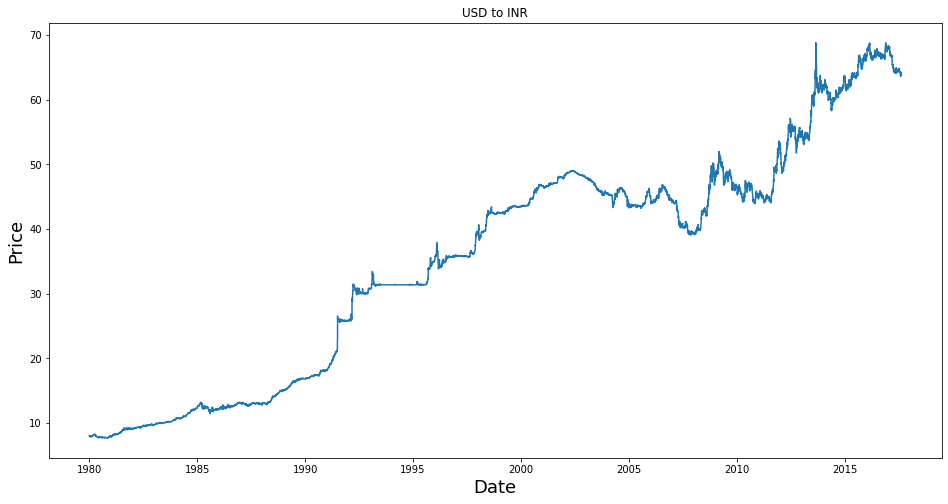

In [3]:
plt.figure(figsize=(16,8))
plt.title("USD to INR")
plt.plot(dataset['Price'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

# Pada tahap ini saya melakukan ploting untuk melihat seperti apa data yang akan diolah, dan ternyata dataset ini menunjukkan bahwa price terus menaik seiring berjalannya waktu

### Data Selection for LSTM Model

In [4]:
data = dataset.filter(['Price'])
dataset = data.values

#Pada tahap ini saya akan memilih data mana yang akan digunakan sebagai data yang akan diprediksi, pemisahan ini dilakukan dengan menggunakan fungsi filter()

### Pre-Processing

In [5]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
# Selanjutnya melakukan proses preprocessing dengan menggunakan MinMaxScaler() agar dapat mengolah data dengan lebih mudah

###Split Data

In [6]:
split = int(len(dataset) * 0.8)
train_data = dataset[0:split,:]
x_train = []
y_train = []

# Kemudian kita akan melakukan split data, proses ini dilakukan untuk memisahkan data training dengan data tes. Berbeda dengan sebelumnya karena ini hanya menggunakan 1 data sehingga saya tidak menggunakan library

In [7]:
train_data

array([[0.00523517],
       [0.00441718],
       [0.00605317],
       ...,
       [0.62206953],
       [0.62200409],
       [0.62355828]])

### Build LSTM Model

In [8]:
Learning_data = 15
# Pada tahap ini saya menggunakan learning data sebesar 15 untuk mengukur seberapa banyak komputer mempelajari pelajaran dulu

In [9]:
for i in range(Learning_data, len(train_data)):
  x_train.append(train_data[i-Learning_data:i, 0])
  y_train.append(train_data[i, 0])
# Selanjutnya memasukkan data berdasarkan jumlah learning rate sebagai bentuk data yang akan ditraining nantinya, data-data dimasukkan dengan menggunakan fungsi append

In [10]:
x_train, y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Mengubah bentuk x_train  agar dapat dikalkulasi nantinya

### LSTM Model

In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.LSTM(50, return_sequences = False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

# Selanjutnya masuk kedalam proses pembuatan model LSTM menggunakan keras, pada tahap awal kita akan membuat model neural network dengan menggunakan keras.Sequential()
# model lstm ini juga menggunakan ada optimizer dengan learning rate berupa 0,001

In [12]:
model.fit(x_train, y_train, batch_size = 1, epochs=5)

#Kemudian kita hanya tinggal menggunakan model.fit untuk memanggil model LSTM, untuk model ini saya menggunakan epoch sebsar 5 dengan batch size 1

Epoch 1/5
7742/7742 [==============================] - 47s 6ms/step - loss: 9.0353e-04
Epoch 2/5
7742/7742 [==============================] - 44s 6ms/step - loss: 1.0313e-04
Epoch 3/5
7742/7742 [==============================] - 44s 6ms/step - loss: 7.5782e-05
Epoch 4/5
7742/7742 [==============================] - 45s 6ms/step - loss: 5.1896e-05
Epoch 5/5
7742/7742 [==============================] - 45s 6ms/step - loss: 3.5268e-05


##Preparing for the test data

In [13]:
test_data = dataset[split - Learning_data:, :]
x_test =[]
y_test = dataset[split:, :]
for i in range(Learning_data, len(test_data)) :
  x_test.append(test_data[i-Learning_data:i, 0])

# Selanjutnya membuat variabel test data yang kemudian displit sesuai dengan ketentuan split diawal
# Kemudian x_test juga akan dimasukkan data-data berdasarkan learning_data nya, data-data tersebut akan digunakan untuk proses belajar oleh model LSTM

In [14]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Kemudian variabel x_test juga akan di reshape agar dapat dikalkulasikan nanti

### Membuat Prediksi Dengan Model LSTM

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Selanjutnya saya akan membuat prediksi dengan memanggil model yang sudah kita buat sebelumnya, prediksi diambil dengan menggunakan data x_test

### Menghitung Error

In [16]:
error = np.sqrt(np.mean(predictions-y_test)**2)
error

# Saya juga akan menghitung tingkat error dengan menggunakan rumus RMSE dan mendapatkan hasil erorr yang cukup besar

56.796687769863134

### Grafik Perbandingan Antara Data Asli dengan Data Prediksi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


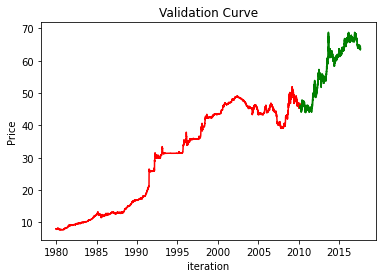

In [17]:
train = data[:split]
valid = data[split:]
valid['Predictions'] = predictions

plt.plot(train, 'red')
plt.plot(valid, 'green')
plt.title('Validation Curve')
plt.xlabel('iteration')
plt.ylabel('Price')
plt.show()

# Berikut adalah validation curve menggunakan model LSTM dan ini merupakan hasil yang cukup oke melihat bahwa garis yang dihasilkan sesuai dengan gambar sebelumnya

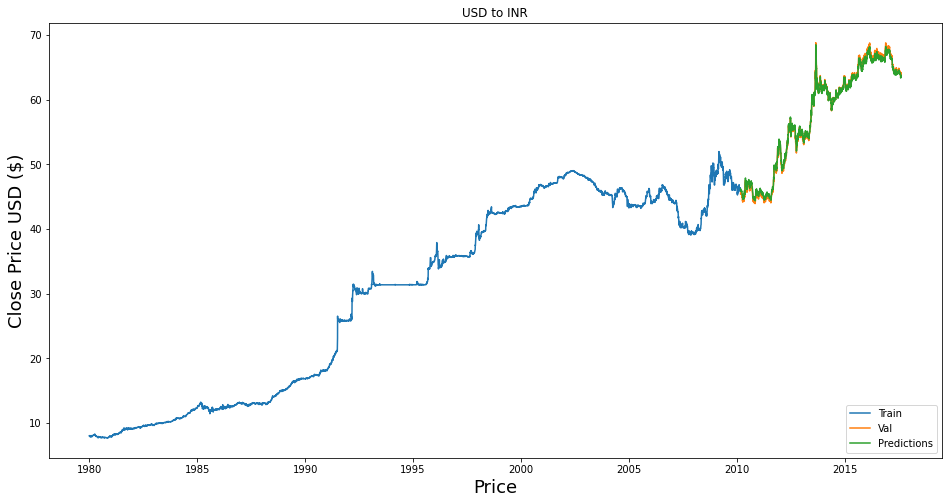

In [18]:
plt.figure(figsize=(16,8))
plt.title("USD to INR")
plt.xlabel('Price', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Perbandingan prediksi, training dan val memiliki keterkaitan yang sangat baik

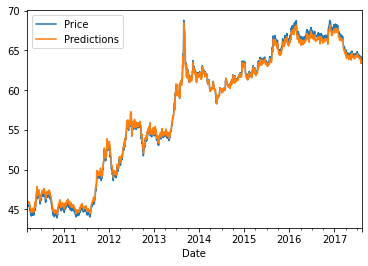

In [19]:
valid.plot()
plt.show()

# Berikut adalag hasil ploting grafik antara price dengan prediction, dapat dilihat disini bahwa hasil prediksi yang dilakukan cukup bagus karena sangat mendekati dengan harga aslinya

###Prediksi Harga Dari 15 Hari Lalu

In [20]:
new_dataset = data
new_data = new_dataset[-Learning_data:].values
new_data = scaler.transform(new_data)
new_data = np.array(new_data)
new_data = np.reshape(new_data, (new_data.shape[0], new_data.shape[1], 1))
pred_price = model.predict(new_data)
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[61.977627]
 [61.987827]
 [61.977627]
 [61.947044]
 [61.71259 ]
 [61.702404]
 [61.789036]
 [61.682022]
 [61.213432]
 [61.284718]
 [61.25416 ]
 [61.422215]
 [61.271477]
 [61.44259 ]
 [61.753365]]
